# Problem 7 (30 Points)

## Problem Description
In this problem, you are given a dataset with two input features and one output. You will use a regression tree to make predictions for this data, evaluating each model on both training and testing data. Then, you will repeat this for multiple random forests.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
- RMSE function
- Create 4 decision tree prediction surface plots
- Create 4 random forest prediction surface plots
- Print RMSE for train and test data for 4 decision tree models
- Print RMSE for train and test data for 4 random forest models
- Answer the 3 questions posed throughout

#### Imports and Utility Functions:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_plot(X,y,model, title=""):
    res = 100
    xrange = np.linspace(min(X[:,0]),max(X[:,0]),res)
    yrange = np.linspace(min(X[:,1]),max(X[:,1]),res)
    x1,x2 = np.meshgrid(xrange,yrange)
    xmesh = np.vstack([x1.flatten(),x2.flatten()]).T
    z = model.predict(xmesh).reshape(res,res)
    
    fig = plt.figure(figsize=(12,10))
    plt.subplots_adjust(left=0.3,right=0.9,bottom=.3,top=.9)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1,x2,z,cmap=cm.coolwarm,linewidth=0,alpha=0.9)
    ax.scatter(X[:,0],X[:,1],y,'o',c='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    plt.title(title)
    plt.show()

## Load the data
Use the `np.load()` function to load "w5-hw2-train.npy" (training data) and "w5-hw2-test.npy" (testing data). The first two columns of each are the input features. The last column is the output.
You should end up with 4 variables, input and output for each of the datasets.

In [7]:
train_data = np.load("data/w5-hw2-train.npy")
test_data = np.load("data/w5-hw2-test.npy")

X_train = train_data[:,0:2]
y_train = train_data[:,-1]
X_test = test_data[:,0:2]
y_test = test_data[:,-1]

print(f"X_train dims: {X_train.shape}")
print(f"y_train dims: {y_train.shape}")

print(f"X_test dims: {X_test.shape}")
print(f"y_test dims: {y_test.shape}")

X_train dims: (1000, 2)
y_train dims: (1000,)
X_test dims: (500, 2)
y_test dims: (500,)


## RMSE function
Complete a root-mean-squared-error function, `RMSE(y, pred)`, which takes in two arrays, and computes the RMSE between them:

In [8]:
def RMSE(y, pred):
    return np.sqrt(np.sum((pred-y)**2/len(y)))

## Regression trees

Train 4 regression trees in sklearn, with max depth values [2,5,10,25]. Train your models on the training data.

Plot the predictions as a surface plot along with test points -- you can use the provided function: `make_plot(X, y, model, title)`.  
For each model, compute the train and test RMSE by calling your RMSE function. Print these results. 

Training RMSE: 35.471849890953415
Test RMSE: 37.54886839401237


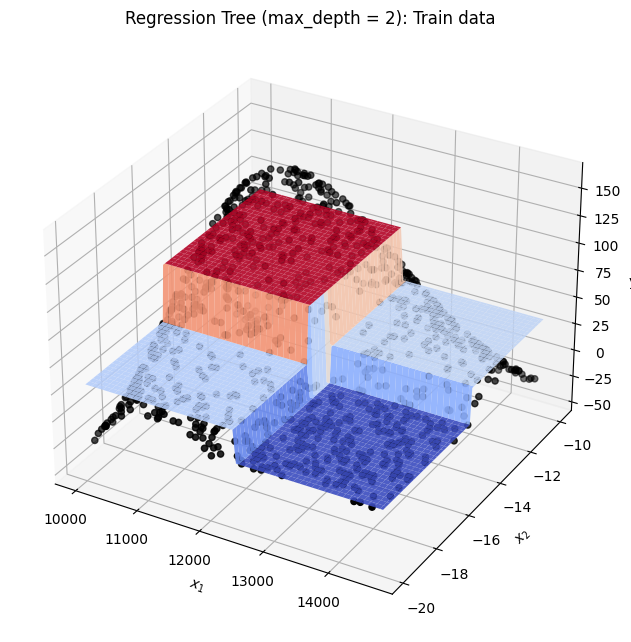

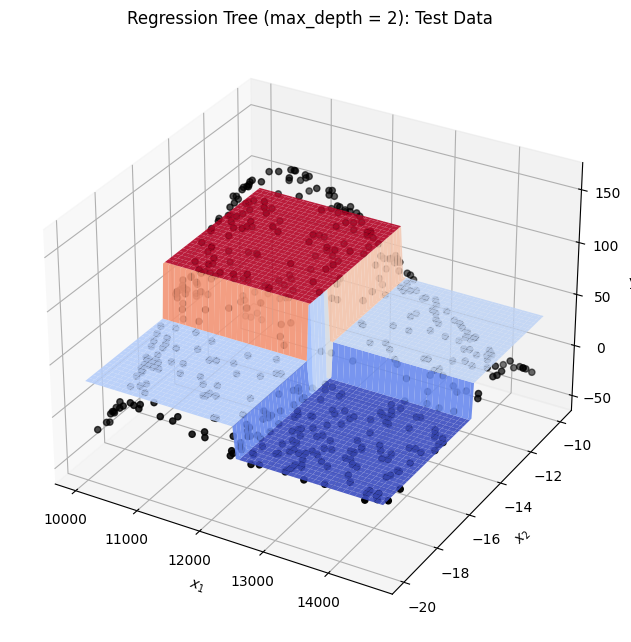

Training RMSE: 17.932673237502154
Test RMSE: 19.02935744931633


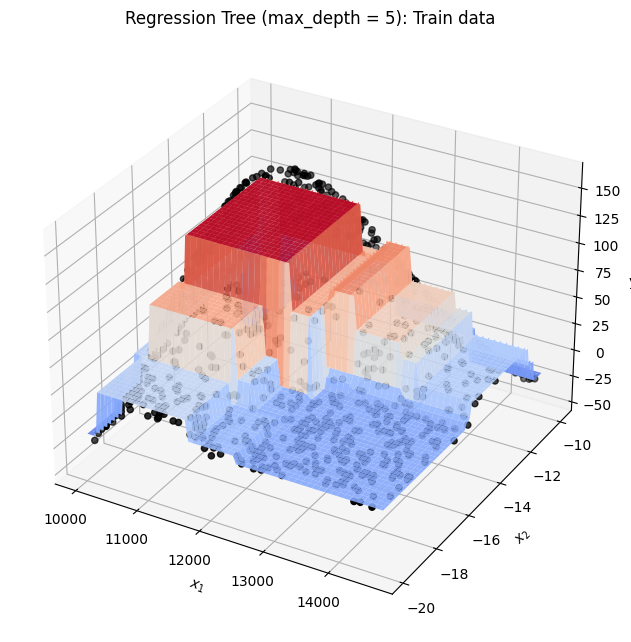

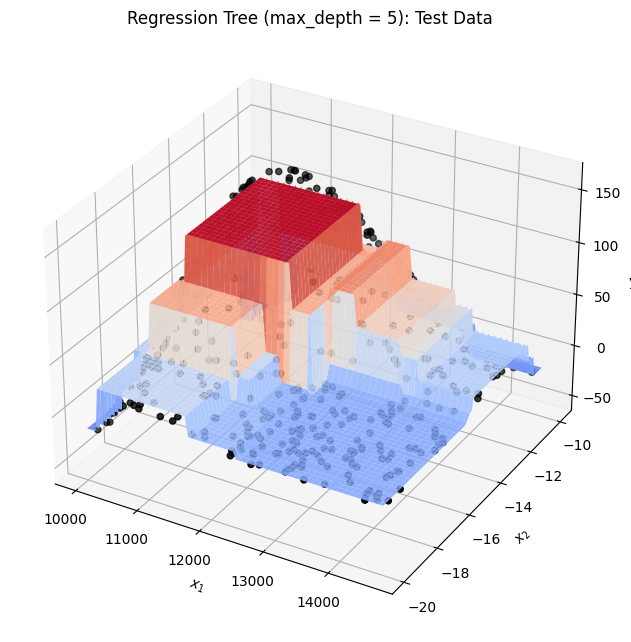

Training RMSE: 4.417134916147934
Test RMSE: 7.741674349728266


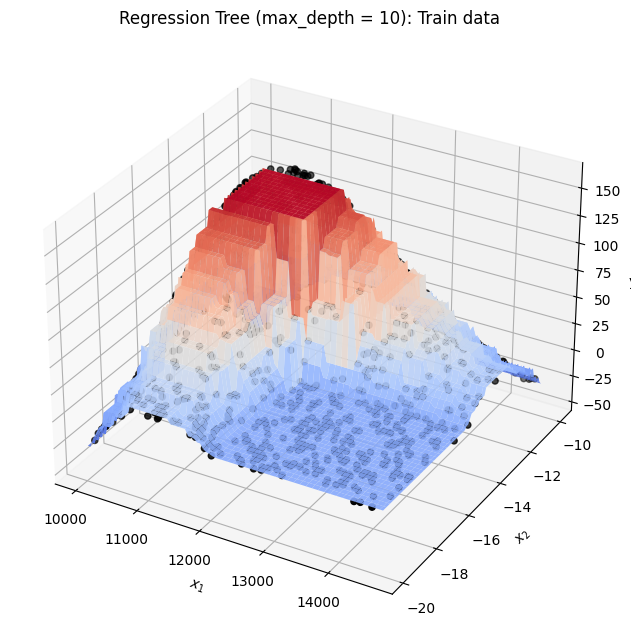

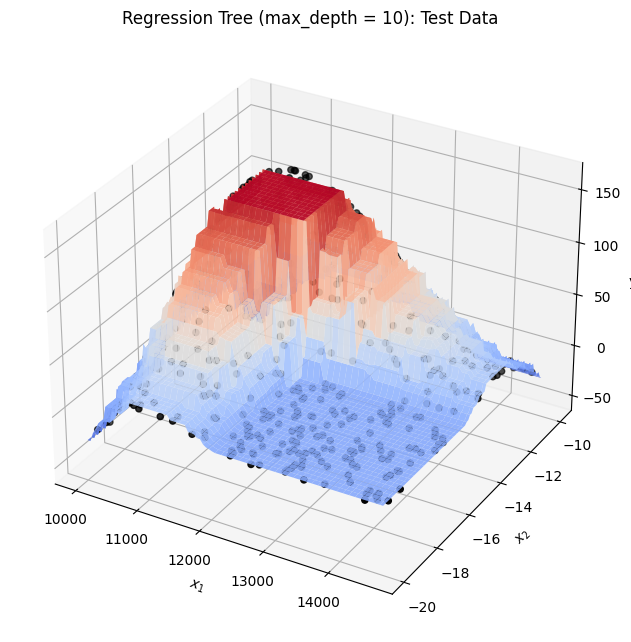

Training RMSE: 0.0
Test RMSE: 6.5998850686316075


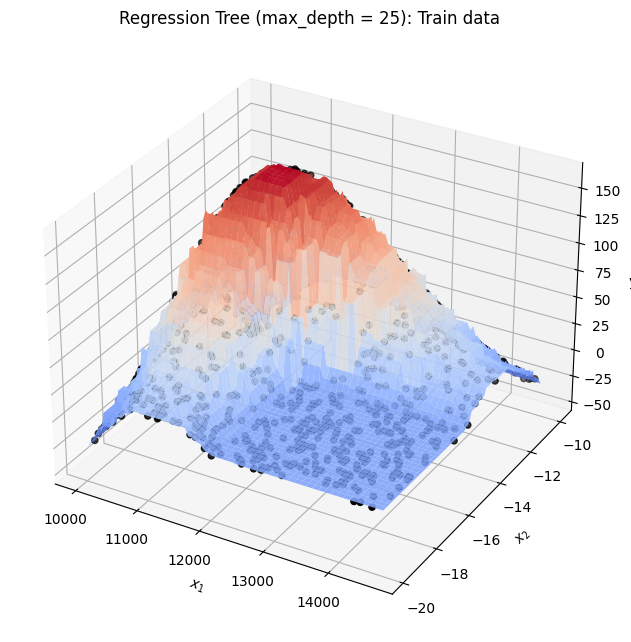

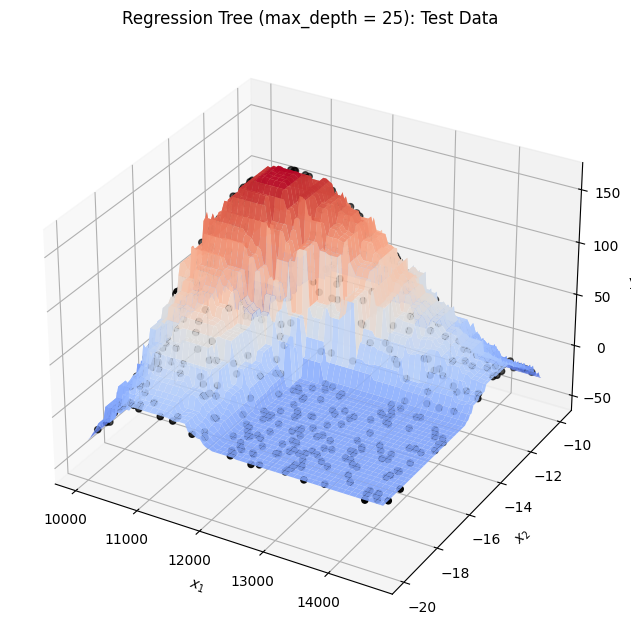

In [9]:
for max_depth in [2,5,10,25]:
    rt = DecisionTreeRegressor(max_depth=max_depth)
    rt.fit(X_train, y_train)

    print(f"Training RMSE: {RMSE(y_train, rt.predict(X_train))}")
    print(f"Test RMSE: {RMSE(y_test, rt.predict(X_test))}")

    make_plot(X_train, y_train, rt, f"Regression Tree (max_depth = {max_depth}): Train data")
    make_plot(X_test, y_test, rt, f"Regression Tree (max_depth = {max_depth}): Test Data")


### Question
- Which of your regression trees performed the best on testing data?  

The max_depth 25 decision tree performed the best because it had the smoothest fit to the data with the least RMSE.

## Regression trees

Train 4 random forests in sklearn. For all of them, use the max depth values from your best-performing regression tree. The number of estimators should vary, with values [5, 10, 25, 100]. 

Plot the predictions as a surface plot along with test points.
Once again, for each model, compute the train and test RMSE by calling your RMSE function. Print these results.

Training RMSE: 2.2994007244644976
Test RMSE: 4.191410979630372


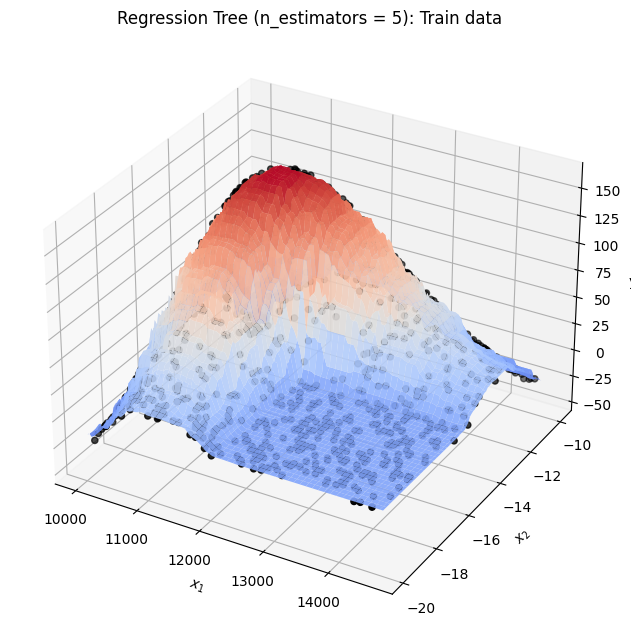

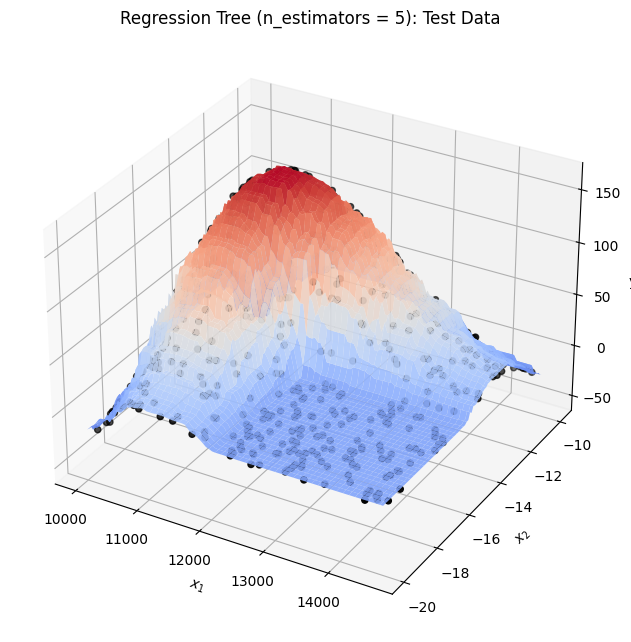

Training RMSE: 1.946928309621805
Test RMSE: 3.70419862884226


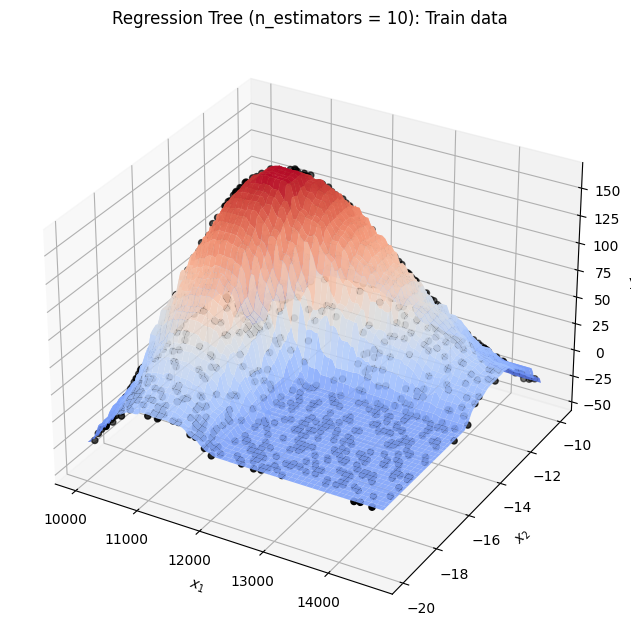

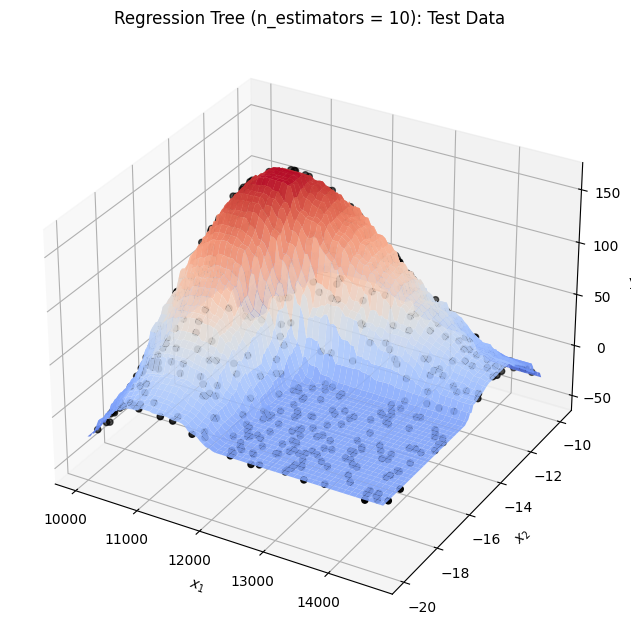

Training RMSE: 1.6187279306787647
Test RMSE: 3.196718196212707


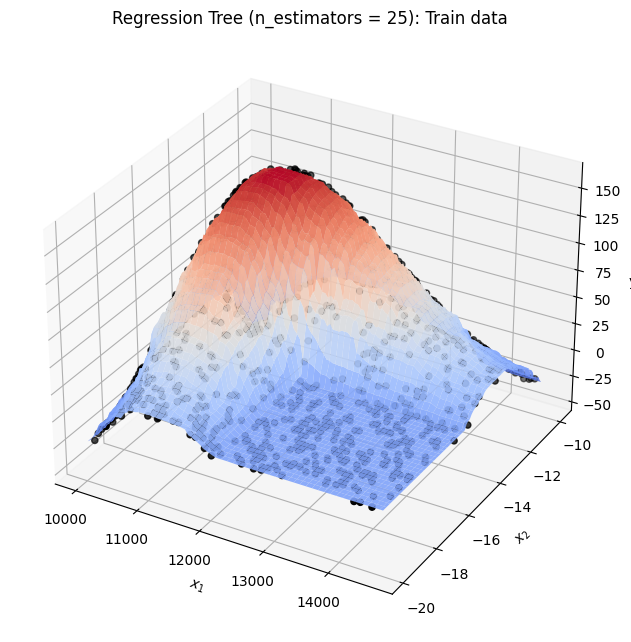

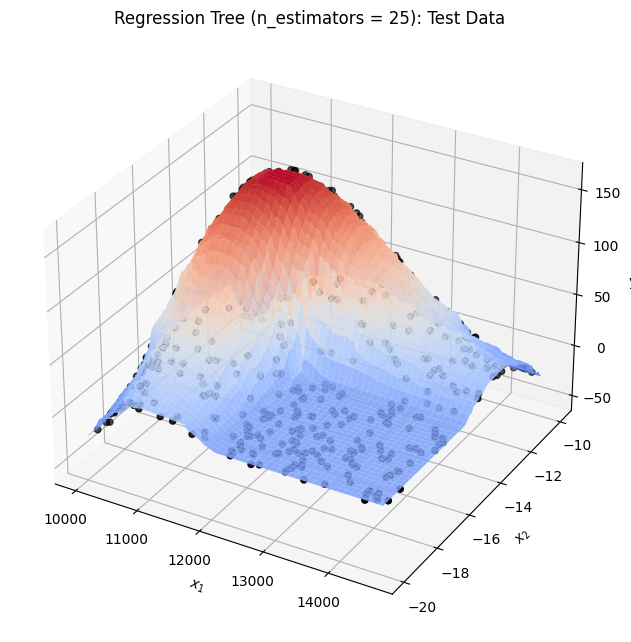

Training RMSE: 1.3553744639148095
Test RMSE: 2.9662405327891483


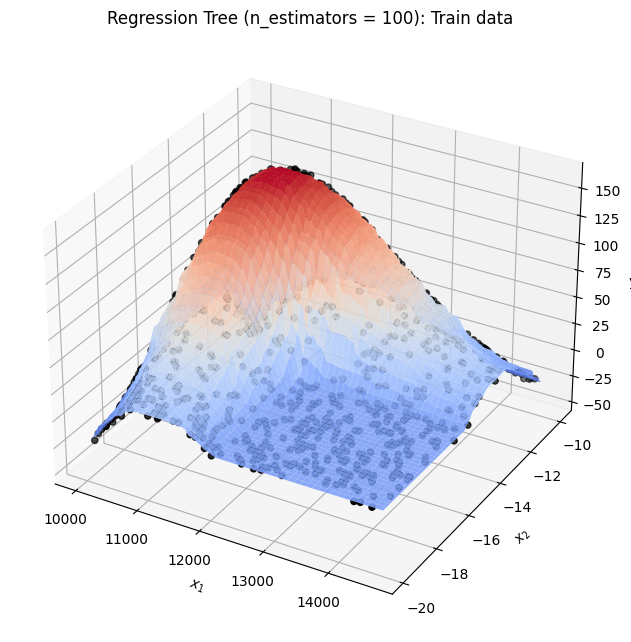

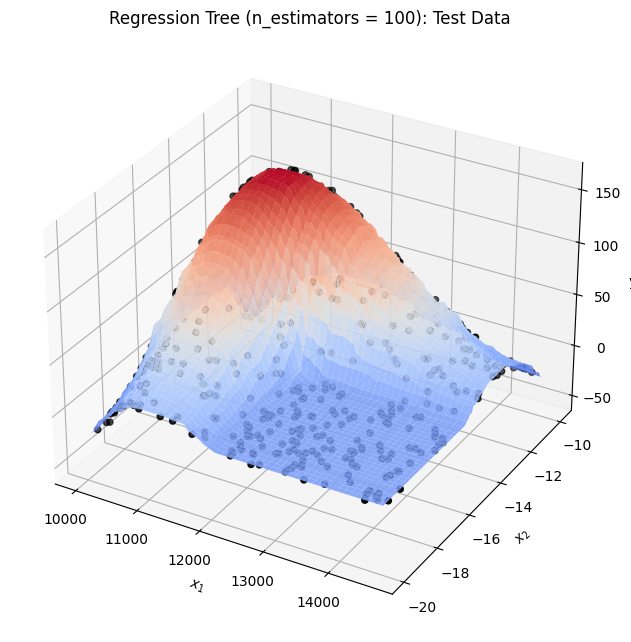

In [10]:
for n_estimators in [5, 10, 25, 100]:
    rt = RandomForestRegressor(max_depth=25, n_estimators=n_estimators)
    rt.fit(X_train, y_train)

    print(f"Training RMSE: {RMSE(y_train, rt.predict(X_train))}")
    print(f"Test RMSE: {RMSE(y_test, rt.predict(X_test))}")

    make_plot(X_train, y_train, rt, f"Regression Tree (n_estimators = {n_estimators}): Train data")
    make_plot(X_test, y_test, rt, f"Regression Tree (n_estimators = {n_estimators}): Test Data")


### Questions
- Which of your random forests performed the best on testing data?  

    The 100 estimator random forest model performed the best on the testing data with a RMSE of 1.91. This also had the smoothest fit through the training data of the 4 models.

- How does the random forest prediction surface differ qualitatively from that of the decision tree? 

    The random forest fit is much smoother than the decision tree fit with less sharp edges. This is to be expected since it is averaging many fits as opposed to a single fit in the case of the decision tree regressor.